In [19]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('/content/Megy_data_1.csv')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 43 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Unnamed: 0                                     1101 non-null   int64  
 1   id                                             1101 non-null   int64  
 2   orig_c1                                        1101 non-null   object 
 3   orig_c2                                        322 non-null    object 
 4   c1                                             1101 non-null   object 
 5   c2                                             322 non-null    object 
 6   c3                                             9 non-null      object 
 7   formula_combined                               1101 non-null   object 
 8   chemical_formula                               533 non-null    object 
 9   x                                              1101 

In [22]:
df = df.drop(columns=['Unnamed: 0'])

In [23]:
new_column_names = {
    'area/volume': 'area_volume',
    'max/min': 'max_min',
    'common_spin': 'org_coating_HAcceptors',
    'Effective anisotropy constant (J/m3)': 'eff_anisotropy_const',
    'magnetic anisotropy constant (J/m3)': 'magn_anisotropy_const',
    'magnetocrystalline anisotropy constant (J/m3)': 'magnetocrystalline_anisotropy_const',
    'Anisotropy constant': 'anisotropy_const',
    'MAE': 'MAE',
    'Curie temperature (K)': 'curie_temp',
    'sphericity': 'sphericity',
    'exchange constant (J/m) *10^-12': 'exchange_const',
    'Electronegativity core': 'electronegativity_core',
    'space_group_core': 'space_group',
    'Demagnetization factors (Nd)': 'demagnetization_factors',
    'sat_em_g': 'saturation_magnetization',
    'coer_oe': 'coercivity',
    'mr (emu/g)': 'remanence_magnetization',
    'interdomain coupling (alpha)': 'interdomain_coupling',
    'mass_magnetic_susceptibility(emu/Oe*g)': 'mass_magnetic_susceptibility',
    'id': 'id',
    'chemical_formula': 'core_composition_formula'
}

df.rename(columns=new_column_names, inplace=True)

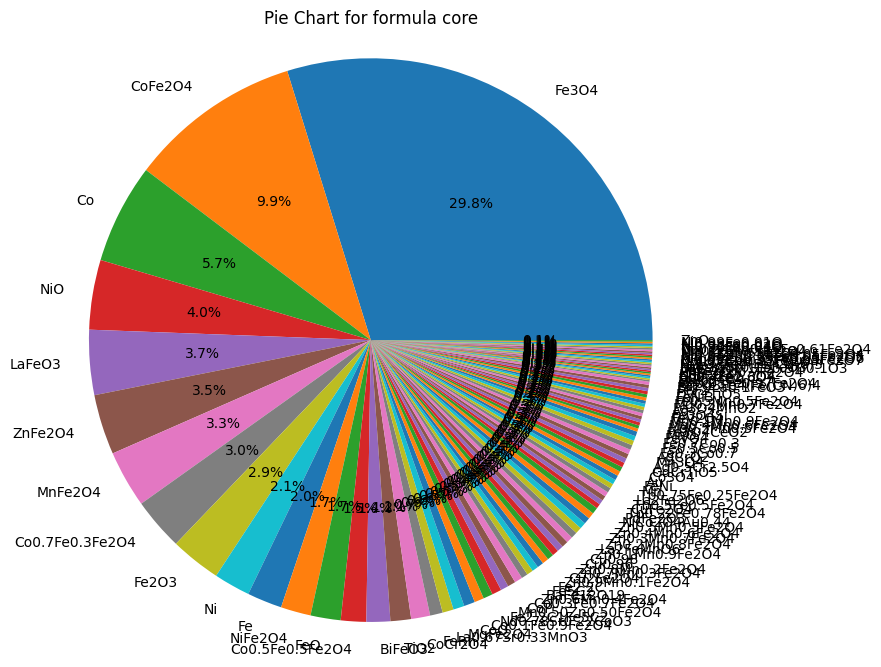

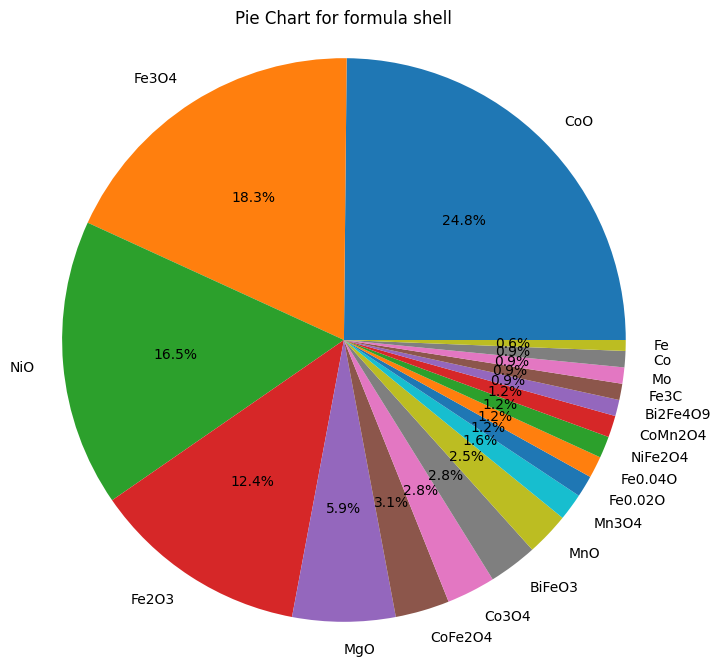

In [24]:
import matplotlib.pyplot as plt

# Данные для круговой диаграммы из колонки df['orig_c1']
orig_c1_counts = df['orig_c1'].value_counts()

# Создание круговой диаграммы для df['orig_c1']
plt.figure(figsize=(8, 8))
plt.pie(orig_c1_counts, labels=orig_c1_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart for formula core')
plt.axis('equal')  # Делает круговую диаграмму круглой
plt.show()

# Данные для круговой диаграммы из колонки df['orig_c2']
orig_c2_counts = df['orig_c2'].value_counts()

# Создание круговой диаграммы для df['orig_c2']
plt.figure(figsize=(8, 8))
plt.pie(orig_c2_counts, labels=orig_c2_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart for formula shell')
plt.axis('equal')  # Делает круговую диаграмму круглой
plt.show()

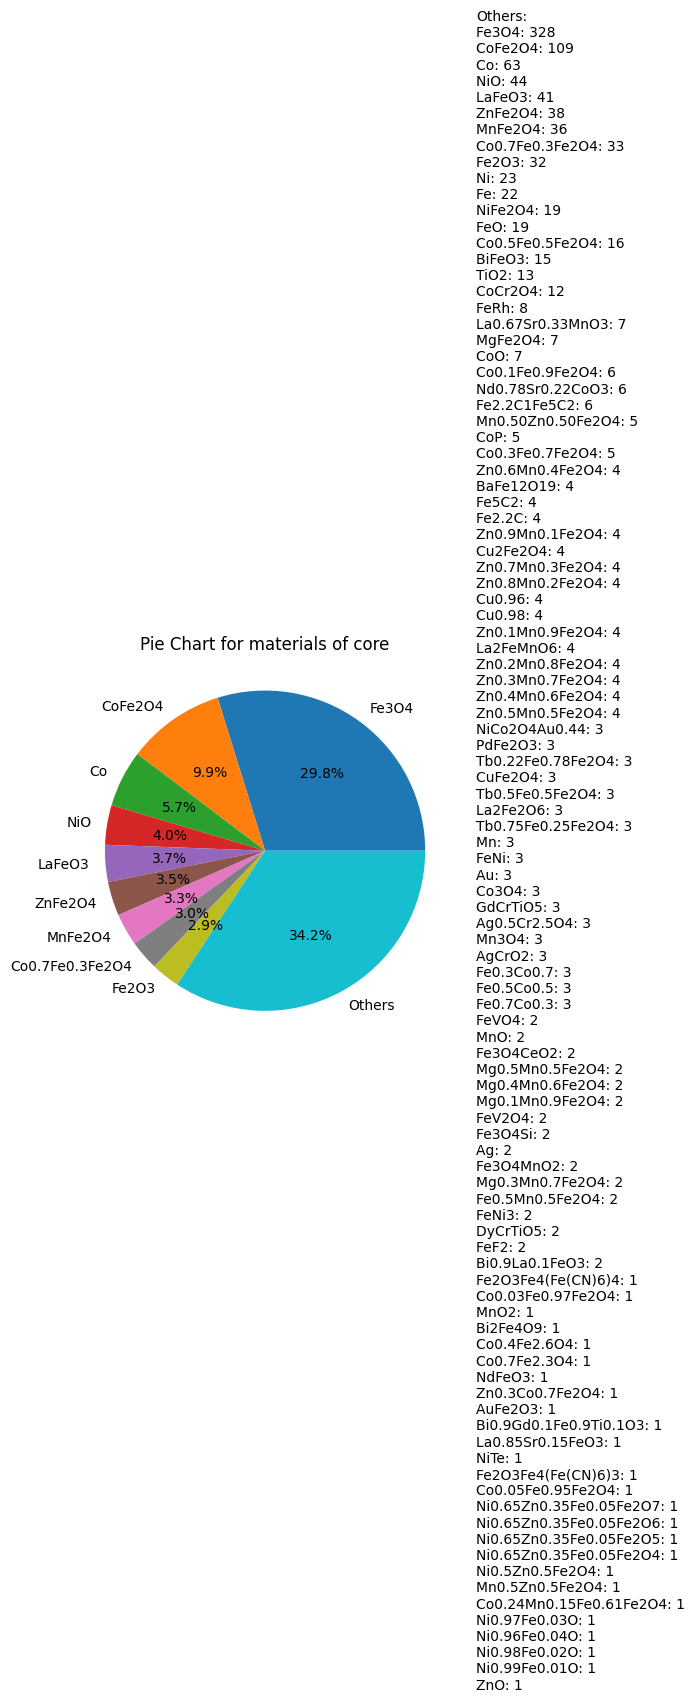

In [25]:
# Данные для круговой диаграммы из колонки df['orig_c2']
orig_c2_counts = df['orig_c1'].value_counts()

# Вычисление общего процента для "Others"
total_count_c2 = sum(orig_c2_counts)
threshold = 0.028
other_count_c2 = orig_c2_counts[orig_c2_counts / total_count_c2 < threshold].sum()

# Фильтрация данных и добавление в "Others"
orig_c2_counts_filtered = orig_c2_counts[orig_c2_counts / total_count_c2 >= threshold]
orig_c2_counts_filtered['Others'] = other_count_c2

# Создание круговой диаграммы для df['orig_c2']
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
wedges, texts, autotexts = plt.pie(orig_c2_counts_filtered, labels=orig_c2_counts_filtered.index, autopct='%1.1f%%', textprops=dict(color="black"))
plt.title('Pie Chart for materials of core')
plt.axis('equal')  # Делает круговую диаграмму круглой

# Аннотация для отображения содержимого "Others"
others_content = '\n'.join([f'{label}: {count}' for label, count in orig_c2_counts.items() if label != 'Others' and count < other_count_c2])
plt.text(1.1, 0.5, f'Others:\n{others_content}', verticalalignment='center', horizontalalignment='left', transform=plt.gca().transAxes)

# Цвет текста автоподписей должен быть белым
for autotext in autotexts:
    autotext.set_color('black')

plt.show()

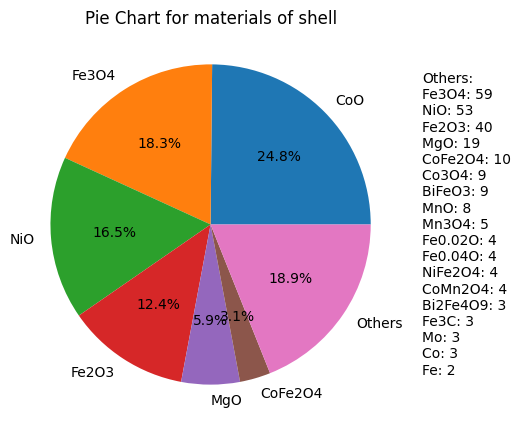

In [26]:
# Данные для круговой диаграммы из колонки df['orig_c2']
orig_c2_counts = df['orig_c2'].value_counts()

# Вычисление общего процента для "Others"
total_count_c2 = sum(orig_c2_counts)
threshold = 0.028
other_count_c2 = orig_c2_counts[orig_c2_counts / total_count_c2 < threshold].sum()

# Фильтрация данных и добавление в "Others"
orig_c2_counts_filtered = orig_c2_counts[orig_c2_counts / total_count_c2 >= threshold]
orig_c2_counts_filtered['Others'] = other_count_c2

# Создание круговой диаграммы для df['orig_c2']
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
wedges, texts, autotexts = plt.pie(orig_c2_counts_filtered, labels=orig_c2_counts_filtered.index, autopct='%1.1f%%', textprops=dict(color="black"))
plt.title('Pie Chart for materials of shell')
plt.axis('equal')  # Делает круговую диаграмму круглой

# Аннотация для отображения содержимого "Others"
others_content = '\n'.join([f'{label}: {count}' for label, count in orig_c2_counts.items() if label != 'Others' and count < other_count_c2])
plt.text(1.1, 0.5, f'Others:\n{others_content}', verticalalignment='center', horizontalalignment='left', transform=plt.gca().transAxes)

# Цвет текста автоподписей должен быть белым
for autotext in autotexts:
    autotext.set_color('black')

plt.show()